In [ ]:
#Student Name: Shrey Pandya
#Stuudent ID : 202518045

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [4]:
df = pd.read_csv("C:\\Users\\shrey\\Downloads\\Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [14]:
df1 = df[["Annual Income (k$)","Spending Score (1-100)"]].values
df1

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Text(0.5, 1.0, ' Annual income vs Spending')

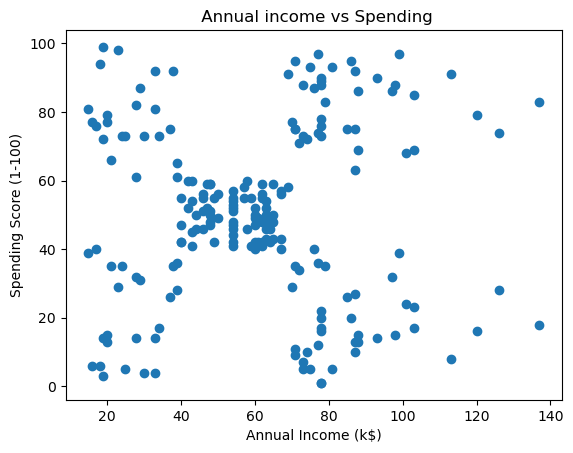

In [16]:
#viualize 
plt.scatter(df1[:,0],df1[:,1])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title(" Annual income vs Spending")

In [18]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

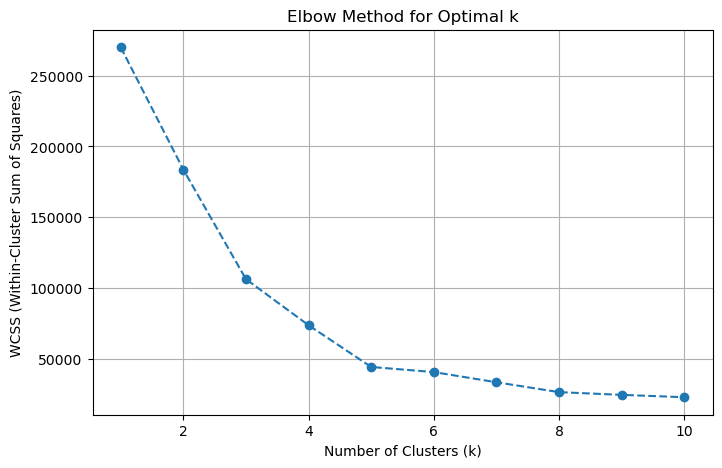

In [21]:
# Plot the Elbow Method results
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker="o", linestyle="--")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()


In [22]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(df1)

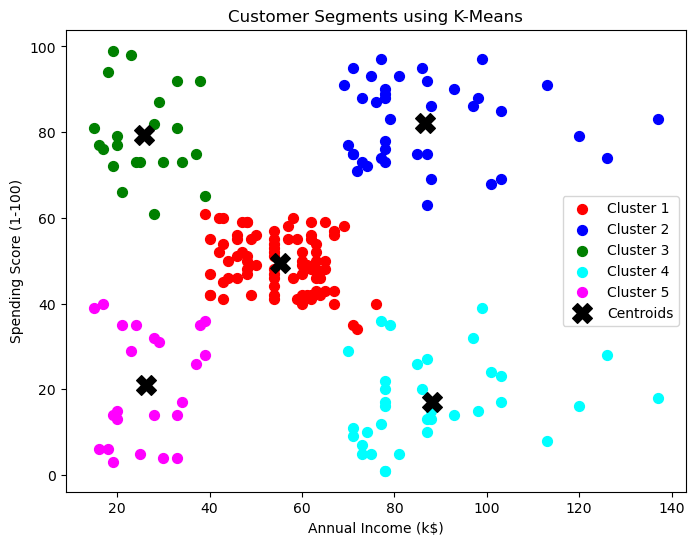

In [29]:
plt.figure(figsize=(8,6))
colors = ['red','blue','green','cyan','magenta','orange','purple','brown','pink','gray']
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
for i in range(optimal_k):
    plt.scatter(df1[y_kmeans == i, 0], df1[y_kmeans == i, 1],
                s=50, c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='Black', label='Centroids', marker='X')
plt.title("Customer Segments using K-Means")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


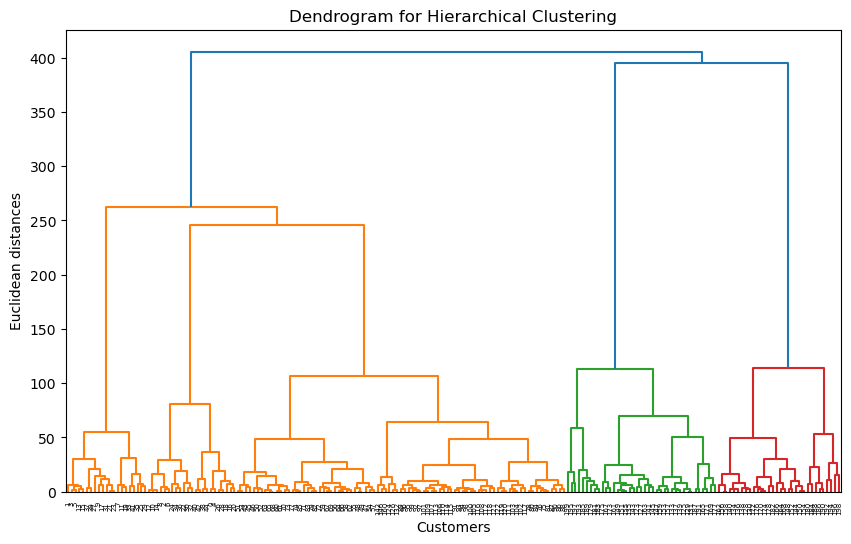

In [123]:
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(df1, method="ward"))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [33]:
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc = hc.fit_predict(df1)

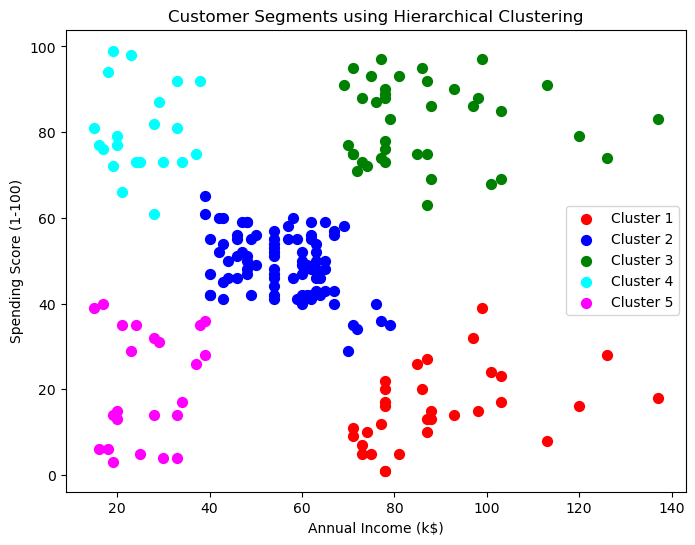

In [35]:
plt.figure(figsize=(8,6))
colors = ['red','blue','green','cyan','magenta']  # limit to 5 colors

for i in range(5):
    plt.scatter(df1[y_hc == i, 0], df1[y_hc == i, 1],
                s=50, c=colors[i], label=f'Cluster {i+1}')

plt.title("Customer Segments using Hierarchical Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [138]:
dbscan = DBSCAN(eps=10, min_samples=6)
y_dbscan = dbscan.fit_predict(df1)

In [134]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

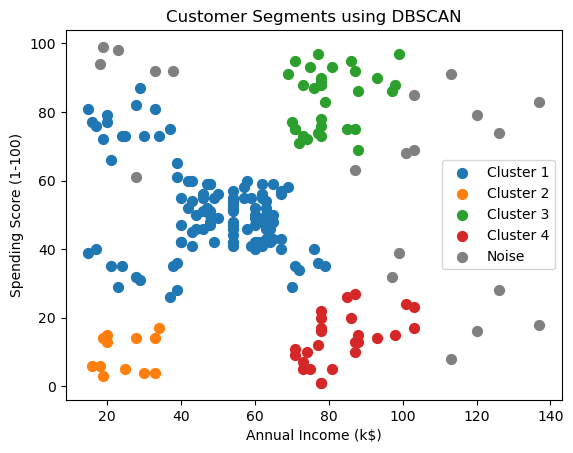

In [139]:
unique_labels = set(y_dbscan)
for label in unique_labels:
    if label == -1:  # Noise
        plt.scatter(df1[y_dbscan == label, 0], df1[y_dbscan == label, 1],
                    s=50, c='grey', label='Noise')
    else:
        plt.scatter(df1[y_dbscan == label, 0], df1[y_dbscan == label, 1],
                    s=50, label=f'Cluster {label+1}')
plt.title("Customer Segments using DBSCAN")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()